In [6]:
!ls books.csv

books.csv


In [7]:
!head books.csv


In [9]:
from pyspark import SparkContext, SparkConf

In [10]:
conf = SparkConf().setAppName("Youtube_Demo").setMaster("local")
sc = SparkContext(conf=conf)

In [11]:
data = sc.textFile('books.csv')

In [12]:
type(data)

pyspark.rdd.RDD

In [13]:
data.first()

'id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url'

In [14]:
for line in data.take(5):
    print(line)
    

id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1,2767052,2767052,2792775,272,439023483,9.78043902348e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg
2,3,3,4640799,491,439554934,9.78043955493e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg
3,41865,41865,3212258,226,316015849,9.7803160

In [15]:
oneRecord = data.first()
aa = oneRecord.split(',')
aa

['id',
 'book_id',
 'best_book_id',
 'work_id',
 'books_count',
 'isbn',
 'isbn13',
 'authors',
 'original_publication_year',
 'original_title',
 'title',
 'language_code',
 'average_rating',
 'ratings_count',
 'work_ratings_count',
 'work_text_reviews_count',
 'ratings_1',
 'ratings_2',
 'ratings_3',
 'ratings_4',
 'ratings_5',
 'image_url',
 'small_image_url']

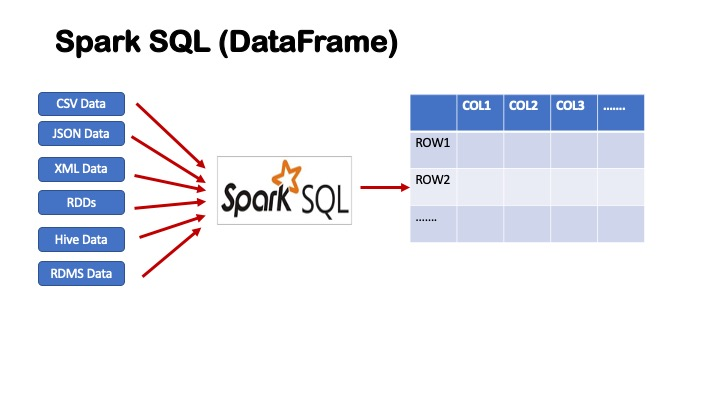

In [16]:
from IPython.display import Image
Image(filename='SQL.jpg')

In [17]:
# Spark RDD APIs – An RDD stands for Resilient Distributed Datasets. It is Read-only partition 
# collection of records. RDD is the fundamental data structure of Spark.

# Spark Dataframe APIs (Spark SQL) – Unlike an RDD, data organized into named columns. For example a 
# table in a relational database. It is an immutable distributed collection of data. 
# DataFrame in Spark allows developers to impose a structure onto a distributed collection of data.
# It is conceptually equal to a table in a relational database.




In [18]:
# Prior Spark 2.0, Spark Context was the entry point of any spark application 
# and used to access all spark features and needed a sparkConf which had all the 
# cluster configs and parameters to create a Spark Context object.


# Spark session is a unified entry point of a spark application from Spark 2.0. 
# unifies all the different contexts in spark and avoids the developer 
# to worry about creating difference contexts.

In [1]:
import pyspark as ps
spark = ps.sql.SparkSession.builder.master("local").appName("BDS_ASSIGN_3").getOrCreate() 


In [2]:
type(spark)

pyspark.sql.session.SparkSession

In [21]:
# Importing books dataset as Spark dataframe

# header=True, Wanted to keep heard with dataframe as most of logic are based on DataFrame Header
# inferSchema=True To auto infer dataset as per the data given as ALS needs only number

books_df = spark.read.csv('books.csv', header=True, inferSchema=True) 

# Lets see schema (Column deatils) of this book_df
books_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- best_book_id: integer (nullable = true)
 |-- work_id: integer (nullable = true)
 |-- books_count: integer (nullable = true)
 |-- isbn: string (nullable = true)
 |-- isbn13: double (nullable = true)
 |-- authors: string (nullable = true)
 |-- original_publication_year: double (nullable = true)
 |-- original_title: string (nullable = true)
 |-- title: string (nullable = true)
 |-- language_code: string (nullable = true)
 |-- average_rating: string (nullable = true)
 |-- ratings_count: string (nullable = true)
 |-- work_ratings_count: string (nullable = true)
 |-- work_text_reviews_count: string (nullable = true)
 |-- ratings_1: double (nullable = true)
 |-- ratings_2: integer (nullable = true)
 |-- ratings_3: integer (nullable = true)
 |-- ratings_4: integer (nullable = true)
 |-- ratings_5: integer (nullable = true)
 |-- image_url: string (nullable = true)
 |-- small_image_url: string (nullable = true)


In [22]:
type(books_df)

pyspark.sql.dataframe.DataFrame

In [24]:
len(books_df.columns)

23

In [3]:
ratings_df = spark.read.csv('ratings.csv', header=True, inferSchema=True) 

In [4]:
type(ratings_df)


pyspark.sql.dataframe.DataFrame

In [5]:
ratings_df.count()

981756

In [26]:
ratings_df.printSchema()

root
 |-- book_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- rating: integer (nullable = true)



In [27]:
ratings_df.first()

Row(book_id=1, user_id=314, rating=5)

In [28]:
ratings_df.show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
|      1|    588|     5|
|      1|   1169|     4|
|      1|   1185|     4|
+-------+-------+------+
only showing top 5 rows



In [29]:
ratings_df.head(5)

[Row(book_id=1, user_id=314, rating=5),
 Row(book_id=1, user_id=439, rating=3),
 Row(book_id=1, user_id=588, rating=5),
 Row(book_id=1, user_id=1169, rating=4),
 Row(book_id=1, user_id=1185, rating=4)]

In [30]:
ratings_df.select("book_id","rating").show(5)

+-------+------+
|book_id|rating|
+-------+------+
|      1|     5|
|      1|     3|
|      1|     5|
|      1|     4|
|      1|     4|
+-------+------+
only showing top 5 rows



In [31]:
ratings_df.filter("rating <= 3").show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    439|     3|
|      1|   5461|     3|
|      1|   7563|     3|
|      1|   9246|     1|
|      1|  20076|     3|
+-------+-------+------+
only showing top 5 rows



In [32]:
ratings_df.select("book_id","rating").filter("rating <= 3").show(5)

+-------+------+
|book_id|rating|
+-------+------+
|      1|     3|
|      1|     3|
|      1|     3|
|      1|     1|
|      1|     3|
+-------+------+
only showing top 5 rows



In [33]:
ratings_df.count()

981756

In [34]:
print("Total number of Ratings Records : {} ".format(ratings_df.count()))

Total number of Ratings Records : 981756 


In [35]:
unique_user_count = ratings_df.select("user_id").distinct().count()
unique_user_count

53424

In [36]:
# Count of Rating whose value is 3 or less than 3.
book_rating_less_or_three_count = ratings_df.filter("rating <= 3").count()
book_rating_less_or_three_count

331429

In [37]:
ratings_df.describe('book_id').show()

+-------+-----------------+
|summary|          book_id|
+-------+-----------------+
|  count|           981756|
|   mean|4943.275635697668|
| stddev|2873.207414896197|
|    min|                1|
|    max|            10000|
+-------+-----------------+



In [38]:
ratings_df.describe('book_id','rating').show()

+-------+-----------------+------------------+
|summary|          book_id|            rating|
+-------+-----------------+------------------+
|  count|           981756|            981756|
|   mean|4943.275635697668|3.8565335989797873|
| stddev|2873.207414896197|0.9839408559620116|
|    min|                1|                 1|
|    max|            10000|                 5|
+-------+-----------------+------------------+



In [39]:
ratings_df.count()

981756

In [40]:
aaa = ratings_df.dropDuplicates()

In [41]:
aaa.count()

980112

In [43]:
## Drop all the rows with null values.
rating_without_null = ratings_df.dropna().count()

In [44]:
ratings_df.dropna('any').count() # drop a row if it contains any nulls

981756

In [45]:
ratings_df.dropna('all').count() # drop a row if it contains any nulls

981756

In [46]:
# Maximum value of any column
ratings_df.agg({'rating':'max'}).show()

+-----------+
|max(rating)|
+-----------+
|          5|
+-----------+



In [47]:
ratings_df.groupby("rating").count().toPandas()

,rating,count
0,1,19575
1,3,248623
2,5,292961
3,4,357366
4,2,63231


In [48]:
ratings_df.groupby("rating").count().show()

+------+------+
|rating| count|
+------+------+
|     1| 19575|
|     3|248623|
|     5|292961|
|     4|357366|
|     2| 63231|
+------+------+



In [49]:
# Join two csv dataset
ratings_df.join(books_df, books_df.book_id == ratings_df.book_id).select("user_id","title").show(5)


+-------+--------------------+
|user_id|               title|
+-------+--------------------+
|    314|Harry Potter and ...|
|    439|Harry Potter and ...|
|    588|Harry Potter and ...|
|   1169|Harry Potter and ...|
|   1185|Harry Potter and ...|
+-------+--------------------+
only showing top 5 rows



In [50]:
ratings_df.orderBy("rating").show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      2|  13794|     1|
|      3|   9246|     1|
|      2|  17643|     1|
|      1|  51480|     1|
|      2|  48687|     1|
+-------+-------+------+
only showing top 5 rows



In [51]:
ratings_df.orderBy(ratings_df.rating.desc()).show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    588|     5|
|      1|   5885|     5|
|      1|   2900|     5|
|      1|   3922|     5|
+-------+-------+------+
only showing top 5 rows



In [52]:
ratings_df.orderBy("rating","book_id").show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|  51480|     1|
|      1|   9246|     1|
|      2|  17643|     1|
|      2|   6063|     1|
|      2|  13794|     1|
+-------+-------+------+
only showing top 5 rows



In [53]:
# Change the value of an existing columns
ratings_df.withColumn("rating", ratings_df.rating*10).show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|    50|
|      1|    439|    30|
|      1|    588|    50|
|      1|   1169|    40|
|      1|   1185|    40|
+-------+-------+------+
only showing top 5 rows



In [54]:
# Add new columns
new_dataset = ratings_df.withColumn("rating_ten", ratings_df.rating*10)
new_dataset.show(5)

+-------+-------+------+----------+
|book_id|user_id|rating|rating_ten|
+-------+-------+------+----------+
|      1|    314|     5|        50|
|      1|    439|     3|        30|
|      1|    588|     5|        50|
|      1|   1169|     4|        40|
|      1|   1185|     4|        40|
+-------+-------+------+----------+
only showing top 5 rows



In [55]:
ratings_df.show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
|      1|    588|     5|
|      1|   1169|     4|
|      1|   1185|     4|
+-------+-------+------+
only showing top 5 rows



In [56]:
# How to drop a column
ratings_df.drop('rating').show(5)

+-------+-------+
|book_id|user_id|
+-------+-------+
|      1|    314|
|      1|    439|
|      1|    588|
|      1|   1169|
|      1|   1185|
+-------+-------+
only showing top 5 rows

